In [ ]:
# Reference:

#https://medium.com/mlearning-ai/wordclouds-with-python-c287887acc8b

In [1]:
# essential libraries
import os 
import pandas as pd
import numpy as np

# regular expressions
import re

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

#for images
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
set_wd = os.chdir(r"C:\Users\Tlhogi\Documents\Grace\Employers\Upwork\20230625_Twitter Sentiment Indicator")

In [3]:
df = pd.read_csv('InputData_FinBERT.csv')
df.head()

,DateTime,TweetId,Text,Language
0,2023-06-21 08:04:41+00:00,1.670000e+18,"Finally, a positive for South Africa as Inflat...",en
1,2023-06-19 10:11:17+00:00,1.670000e+18,USD/ZAR: Rand will remain fragile on geopoliti...,en
2,2023-06-16 21:12:51+00:00,1.670000e+18,South Africa's risk is real - influential Amer...,en
3,2023-06-16 18:12:57+00:00,1.670000e+18,Factors that are helping mitigate against Sout...,en
4,2023-06-16 09:01:58+00:00,1.670000e+18,Probably am too critical of Zanu pf government...,en


In [86]:
# converting "Text" column into list
a = list(df['Text'])

In [ ]:
# converting list into string and then joining it with space
all_text = ' '.join(str(x) for x in a) 

In [88]:
def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    return string

def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()

    # Use tokenizer
    string = tokenizer.tokenize(string, return_str = True)

    return string

def stem(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()

    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]

    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))

    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

def clean(text):
    '''
    This function combines the above steps and added extra stop words to clean text
    '''
    return remove_stopwords(lemmatize(basic_clean(text)))

In [89]:
text_4 = clean(all_text)

In [120]:
#Extra steps to clean:

#remove all words starting with "https"
text_4 = re.sub(r'http\S+', '', text_4)

#remove all digits/numbers
text_4 = re.sub(r'[0-9]', '', text_4)

#remove single digit words
text_4 = re.sub(r"\b[a-zA-Z]\b", '', text_4)

#Remove specific non-sensical words that occur very frequently
stopwords = ["ha", "wa", "_"]
resultwords  = [word for word in text_4.split() if word.lower() not in stopwords]
text_4 = ' '.join(resultwords)

print(len(text_4))
print(text_4[0:5000])

706181
finally positive south africa inflation come better expected pause sarb dailyfxteam dailyfx southafrica mzansi usdzar southafricanrand inflation interestrates usdzar rand remain fragile geopolitics ing usdzar southafrica bank south africa risk real influential american senator pushing rsa dropped agoa people appear believe rapprochement may work rand best performing currency world month nextafrica bloombergafrica factor helping mitigate south africa defaulting debt debt service cost subtracted budget allocating revenue significant portion sa debt randdenominated currency issuer zero default risk probably critical zanu pf government may ask zimbabwe country sadc region doesnt sell fuel local currency south africa service station accept rand strictly usd offer rand legal currency country africa make south africa economic center africa east london africa super city south africa doe need call trade using currency power well except orania currency wonder got equal rand dont stock exc

In [135]:
#Reference:
#https://www.geeksforgeeks.org/find-frequency-of-each-word-in-a-string-in-python/
#https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/

from collections import OrderedDict

def freq(str):
    str_list = str.split()
    frequency = {}
    for word in str_list:
        frequency[word] = frequency.setdefault(word, 0) + 1
    
    keys = list(frequency.keys())
    values = list(frequency.values())
    
    sorted_value_index = np.argsort(values)
    sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

    # for key, value in sorted_dict.items():
    #     print(key, ':', value)
    
    df = pd.DataFrame(list(sorted_dict.items()))
    print(df.tail(100))
    df.to_csv("Text_Frequency.csv")
    
freq(text_4)


             0     1
9267       cut   101
9268        em   102
9269        go   102
9270       see   102
9271   foreign   103
...        ...   ...
9362      rate  2871
9363      rand  5486
9364  currency  5948
9365    africa  6560
9366     south  8019

[100 rows x 2 columns]


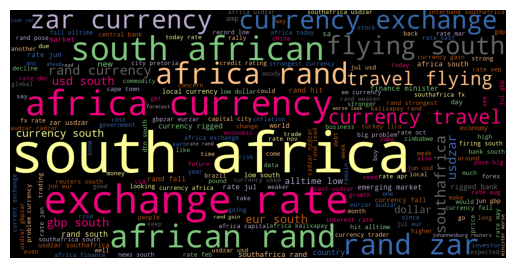

In [128]:
#wc = WordCloud().generate(text_4)
wc = WordCloud(colormap = 'Accent',
                    stopwords = ['meta'], 
                    width = 1500, height = 750).generate(text_4)
plt.axis("off")
plt.imshow(wc)

In [130]:
import array
SA_Map = np.array(Image.open('.\SA_Map.png'))
SA_Map


array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

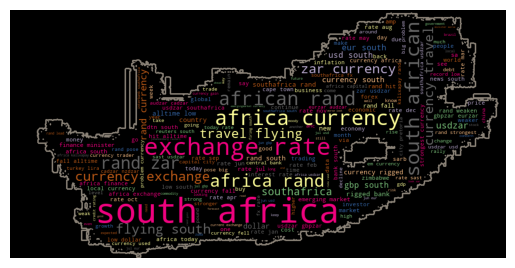

In [131]:
#Reference:
#https://www.color-hex.com/color-names.html

wc = WordCloud(background_color = 'black', 
                   mask = SA_Map, contour_width = 2,
                     contour_color = '#8b8378', 
                       colormap = 'Accent', 
                       width =1500, height = 1000).generate(text_4)
plt.axis("off")
plt.imshow(wc)

In [133]:
#Reference:
#https://www.datacamp.com/tutorial/wordcloud-python

# store to file
savecloud = wc.to_file('WordCloud_SA.png')